# File Summary
This file contains half of our Data Exploration. The other half can be found in Data_Exploration_2. The reason we needed 2 files was because we used an external library- wordcloud to generate the wordclouds as a visualization and it consumed a lot of data in the jupyter notebook, causing a file save error. We used word clouds to visualize the top words that occured in each genre. We also created a bar chart for each genre to demostrate how those words compared to the rest of the genres. The final results can be read at the bottom of Data Exploration2. In order for word cloud to work, please run "pip install wordcloud"

In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import urllib
from PIL import Image
from bs4 import BeautifulSoup
import requests
from sklearn.model_selection import cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from os import path
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter
movie_df = pd.read_csv("shuffled_movie_df.csv")
movie_df.head()

,Movie Name,Poster Image Link,Synopsis,Genre,IMDb_id,Plot Keywords,Storyline,Genre Variations
0,Big Fish,https://m.media-amazon.com/images/M/MV5BMTYyMz...,A frustrated son tries to determine the fa...,Adventure,tt0319061,fish father son relationship death of father f...,United Press International journalist Will...,Adventure Drama Fantasy
1,Scott Pilgrim vs. the World,https://m.media-amazon.com/images/M/MV5BMTkwNT...,Scott Pilgrim must defeat his new girlfrie...,Action,tt0446029,toronto canada sexy woman cleavage panties sca...,Scott Pilgrim plays in a band which aspire...,Action Comedy Fantasy
2,The Paleface,https://m.media-amazon.com/images/M/MV5BOGZhMG...,Calamity Jane is despatched to find out wh...,Western,tt0040679,comedy of errors misunderstanding punched in t...,Someone is selling guns to the Indians and...,Comedy Family Western
3,How the West Was Won,https://m.media-amazon.com/images/M/MV5BNTk2ND...,A family saga covering several decades of ...,Western,tt0056085,ulysses s. grant character abraham lincoln cha...,Setting off on a journey to the west in th...,Western
4,The Butterfly Effect,https://m.media-amazon.com/images/M/MV5BODNiZm...,Evan Treborn suffers blackouts during sign...,Sci-Fi,tt0289879,love butterfly effect child pornography time t...,Evan Treborn grows up in a small town with...,Drama Sci-Fi Thriller


# Most Common Words in Horror

In [14]:
horror_series = movie_df[movie_df["Genre"] == "Horror"]
horror_text=""
for text in horror_series.Synopsis:
    horror_text+=text

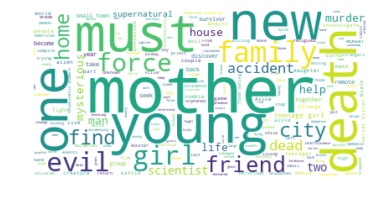

In [15]:
wordcloud = WordCloud(background_color="white").generate(horror_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
horror_movies_df = movie_df[movie_df["Genre"] == "Horror"]

bag_of_words_horror = (
    horror_movies_df["Synopsis"].
    str.lower().
    str.replace("[^A-Za-z\s]", "").
    str.split()
).apply(Counter)

tf_horror = pd.DataFrame(list(bag_of_words_horror)).fillna(0)
tf_horror.sum().sort_values()[-50:]

two           7.0
but           7.0
only          7.0
it            7.0
town          7.0
friends       7.0
dead          7.0
them          7.0
teenage       7.0
accident      7.0
home          7.0
city          7.0
small         8.0
she           8.0
they          8.0
death         8.0
he            8.0
evil          8.0
when          9.0
where         9.0
one           9.0
new          10.0
must         10.0
young        11.0
mother       12.0
from         12.0
has          12.0
at           12.0
into         12.0
are          12.0
girl         13.0
as           14.0
his          15.0
on           15.0
for          17.0
after        19.0
with         20.0
that         21.0
who          22.0
their        22.0
an           29.0
by           33.0
is           38.0
her          53.0
and          59.0
in           64.0
of           69.0
to           85.0
the         124.0
a           178.0
dtype: float64

According to this TF for horror movies above, it seems like the most common words (if we take out common words like "the", "and", etc.) in the horror movie sysnopsis are: "mother", "evil", "death", "city", "accident" , "teenage", "friends", "town", "home"

In [23]:
common_horrorwords = ["mother", "evil", "death", "city", "accident" , "teenage", "friends",
                "town", "home"]
counter = []
for text,genre in zip(movie_df["Synopsis"],movie_df["Genre"]):
    text = text.lower().replace("[^A-Za-z\s]", "")
    count=0
    for word in text.split(" "): 
        if(word in common_horrorwords):
            count+=1
    counter.append(count)
movie_df["Word Count"] = counter

Common Horror Words: mother, evil, death, city, accident ,teenage, friends, town, home


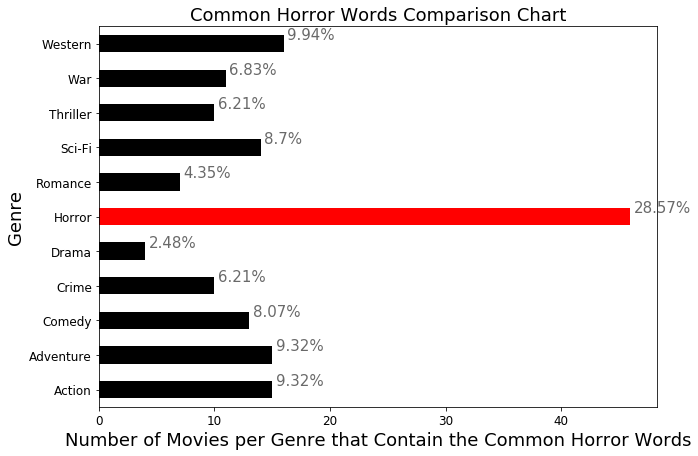

In [24]:
start = "\033[1m"
end = "\033[0;0m"
print(start+"Common Horror Words: mother, evil, death, city, accident ,"+ 
      "teenage, friends, town, home"+end)
word_count = movie_df.groupby("Genre")["Word Count"].sum()
c = ["black","black","black","black","black","red",
     "black","black","black","black","black"]
ax = word_count.plot.barh(figsize=(10,7),
                         fontsize = 12,color=c)
ax.set_xlabel("Number of Movies per Genre that Contain the Common Horror Words"
              , fontsize=18)
ax.set_ylabel("Genre"
              , fontsize=18)
ax.set_title("Common Horror Words Comparison Chart", fontsize=18)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# Results
From the looking at the word frequencies for horror movie synopsis, we were able to look and see what words were most common in the horror movie synopsis. Once we received the most common horror words, we created a bar graph displaying how these words compared to the the other genres. According to the graph above, these words, as expected occured the most in horror movies.

# Most Common Words in Action

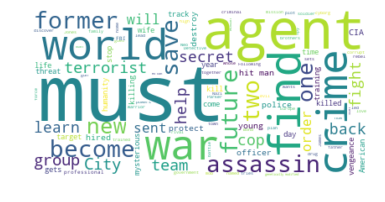

In [18]:
action_series = movie_df[movie_df["Genre"] == "Action"]
action_text=""
for text in action_series.Synopsis:
    action_text+=text
wordcloud = WordCloud(background_color="white").generate(action_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
action_movies_df = movie_df[movie_df["Genre"] == "Action"]

bag_of_words_action = (
    action_movies_df["Synopsis"].
    str.lower().
    str.replace("[^A-Za-z\s]", "").
    str.split()
).apply(Counter)

tf_action = pd.DataFrame(list(bag_of_words_action)).fillna(0)
tf_action.sum().sort_values()[-50:]

officer      5.0
team         5.0
one          6.0
group        6.0
its          6.0
cia          6.0
down         6.0
find         6.0
world        7.0
new          7.0
out          7.0
save         7.0
city         7.0
where        7.0
former       8.0
future       8.0
two          8.0
their        8.0
him          8.0
war          8.0
are          9.0
into         9.0
they         9.0
her         10.0
but         10.0
at          10.0
while       11.0
when        11.0
after       11.0
for         12.0
agent       13.0
against     13.0
as          14.0
must        15.0
he          16.0
who         17.0
on          17.0
that        18.0
with        25.0
an          27.0
by          27.0
from        27.0
is          35.0
his         48.0
in          50.0
of          63.0
and         70.0
to          88.0
the        123.0
a          163.0
dtype: float64

According to this TF for action movies above, it seems like the most common words (if we take out common words like "the", "and", etc.) in the action movie sysnopsis are: "against", "agent", "war", "future", "world", "cia", "team", "officer"

Common Action Words: against, agent, future, world, cia, team, officer,save, must


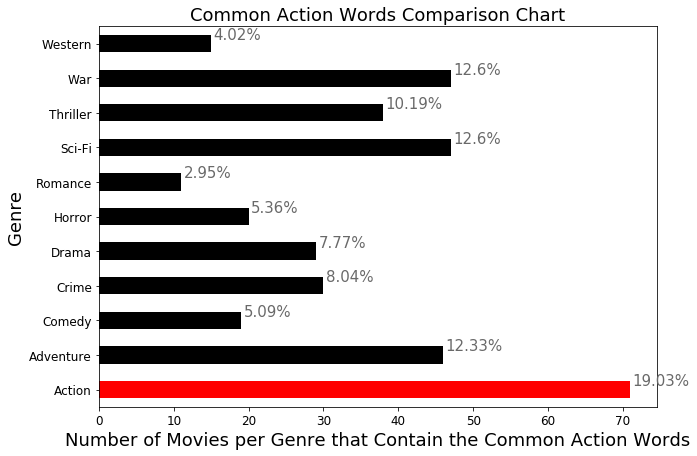

In [31]:
common_actionwords = ["against", "agent", "future", "world", "cia", "team", 
                "officer", "save", "must"]
counter = []
for text,genre in zip(movie_df["Synopsis"],movie_df["Genre"]):
    text = text.lower().replace("[^A-Za-z\s]", "")
    count=0
    for word in text.split(" "): 
        if(word in common_actionwords):
            count+=1
    counter.append(count)
movie_df["Word Count"] = counter
start = "\033[1m"
end = "\033[0;0m"
print(start+"Common Action Words: against, agent, future, world, cia, team, officer,"+ 
                "save, must"+end)
word_count = movie_df.groupby("Genre")["Word Count"].sum()
c = ["red","black","black","black","black","black",
     "black","black","black","black","black"]
ax = word_count.plot.barh(figsize=(10,7),
                         fontsize = 12,color=c)
ax.set_xlabel("Number of Movies per Genre that Contain the Common Action Words"
              , fontsize=18)
ax.set_ylabel("Genre"
              , fontsize=18)
ax.set_title("Common Action Words Comparison Chart", fontsize=18)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# Results
From the looking at the word frequencies for action movie synopsis, we were able to look and see what words were most common in the action movie synopsis. Once we received the most common action words, we created a bar graph displaying how these words compared to the the other genres. According to the graph above, these words, as expected occured the most in action movies, but what was surprising was that war and sci-fi movies contained similar words to action movies as well. 

# Most Common words in Western

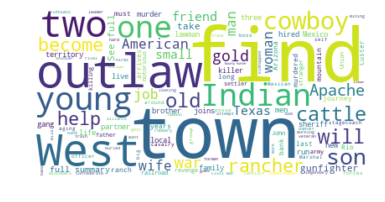

In [19]:
western_series = movie_df[movie_df["Genre"] == "Western"]
western_text=""
for text in western_series.Synopsis:
    western_text+=text
wordcloud = WordCloud(background_color="white").generate(western_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
western_movies_df = movie_df[movie_df["Genre"] == "Western"]

bag_of_words_western = (
    western_movies_df["Synopsis"].
    str.lower().
    str.replace("[^A-Za-z\s]", "").
    str.split()
).apply(Counter)

tf_western = pd.DataFrame(list(bag_of_words_western)).fillna(0)
tf_western.sum().sort_values()[-50:]

gold         6.0
summary      6.0
are          6.0
job          6.0
woman        6.0
help         7.0
that         7.0
son          7.0
finds        7.0
see          7.0
outlaws      7.0
out          7.0
cattle       7.0
old          8.0
will         8.0
cowboy       8.0
outlaw       8.0
at           8.0
be           8.0
war          9.0
has          9.0
her         10.0
two         10.0
find        10.0
as          10.0
young       10.0
up          11.0
but         11.0
him         11.0
after       12.0
town        14.0
west        14.0
their       15.0
who         16.0
when        17.0
from        17.0
he          19.0
on          20.0
with        21.0
by          24.0
is          26.0
for         30.0
an          31.0
his         44.0
in          52.0
and         66.0
of          76.0
to          83.0
the        135.0
a          142.0
dtype: float64

According to this TF for western movies above, it seems like the most common words (if we take out common words like "the", "and", etc.) in the wesern movie sysnopsis are: "west","town", "outlaw", "cowboy", "cattle", "outlaws", "son", "find", "gold", "finds"

Common Western Words: west, town, outlaw, cowboy, cattle, outlaws, son,find, gold, finds


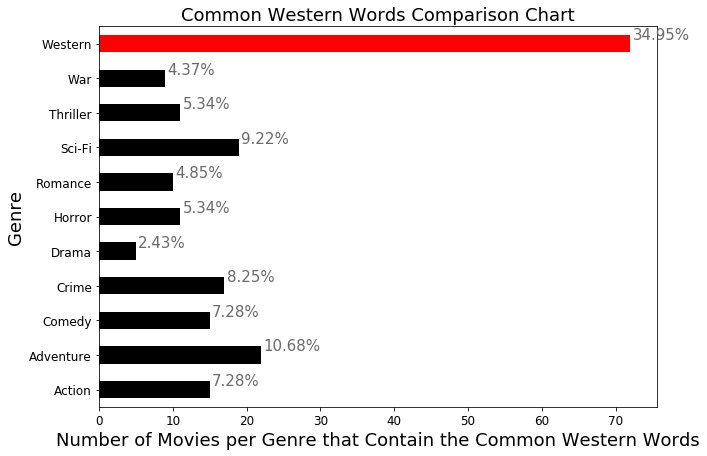

In [34]:
common_westernwords = ["west","town", "outlaw", "cowboy", "cattle", "outlaws", 
                "son", "find", "gold", "finds"]
counter = []
for text,genre in zip(movie_df["Synopsis"],movie_df["Genre"]):
    text = text.lower().replace("[^A-Za-z\s]", "")
    count=0
    for word in text.split(" "): 
        if(word in common_westernwords):
            count+=1
    counter.append(count)
movie_df["Word Count"] = counter
start = "\033[1m"
end = "\033[0;0m"
print(start+"Common Western Words: west, town, outlaw, cowboy, cattle, outlaws, son,"+ 
      "find, gold, finds"+end)
word_count = movie_df.groupby("Genre")["Word Count"].sum()
c = ["black","black","black","black","black","black",
     "black","black","black","black","red"]
ax = word_count.plot.barh(figsize=(10,7),
                         fontsize = 12,color=c)
ax.set_xlabel("Number of Movies per Genre that Contain the Common Western Words"
              , fontsize=18)
ax.set_ylabel("Genre"
              , fontsize=18)
ax.set_title("Common Western Words Comparison Chart", fontsize=18)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# Results
From the looking at the word frequencies for western movie synopsis, we were able to look and see what words were most common in the Western movie synopsis. Once we received the most common western words, we created a bar graph displaying how these words compared to the the other genres. According to the graph above, these words, as expected occured the most in Western movies, the second closest at 10.68% was Adventure movies but that did not nearly compare to the Western Genre. 

# Most Common Words in Adventure

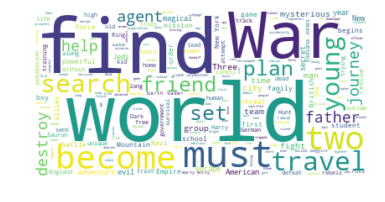

In [20]:
adventure_series = movie_df[movie_df["Genre"] == "Adventure"]
adventure_text=""
for text in adventure_series.Synopsis:
    adventure_text+=text
wordcloud = WordCloud(background_color="white").generate(adventure_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
adventure_movies_df = movie_df[movie_df["Genre"] == "Adventure"]

bag_of_words_adventure = (
    adventure_movies_df["Synopsis"].
    str.lower().
    str.replace("[^A-Za-z\s]", "").
    str.split()
).apply(Counter)

tf_adventure = pd.DataFrame(list(bag_of_words_adventure)).fillna(0)
tf_adventure.sum().sort_values()[-50:]

during          6.0
journey         6.0
help            6.0
destroy         6.0
three           6.0
mysterious      6.0
group           6.0
travel          6.0
them            6.0
city            6.0
team            6.0
search          7.0
becomes         7.0
young           7.0
agent           7.0
its             8.0
are             8.0
at              8.0
two             8.0
out             8.0
war             8.0
but             8.0
against         9.0
new             9.0
while           9.0
must           10.0
that           10.0
they           10.0
find           11.0
who            11.0
he             14.0
world          14.0
into           14.0
their          15.0
after          17.0
for            18.0
as             18.0
by             19.0
is             20.0
on             20.0
with           22.0
from           23.0
an             31.0
his            48.0
in             60.0
of             78.0
and            80.0
to            107.0
the           154.0
a             169.0


According to this TF for adventure movies above, it seems like the most common words (if we take out common words like "the", "and", etc.) in the adventure movie sysnopsis are: "journey", "help", "destroy", "out", "war", "agent", "search", "team", "travel", "mysterious"

Common Adventure Words: journey, help, destroy, out, plan, agent,search, team, travel, mysterious


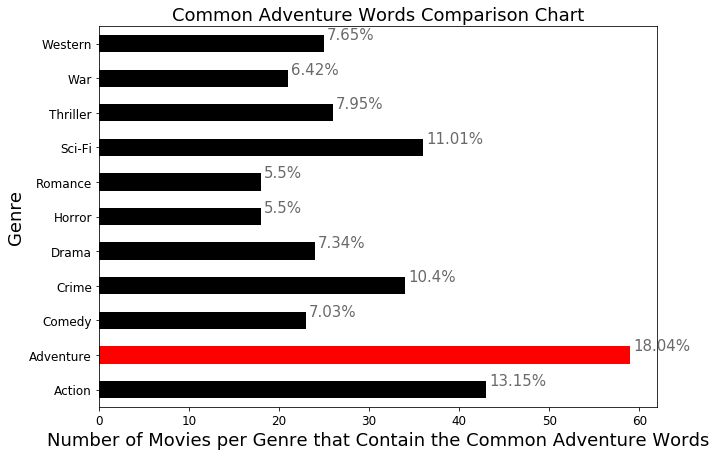

In [39]:
common_adventurewords = ["journey", "help", "destroy", "out", "plan", "agent", "search", 
                "team", "travel", "mysterious"]
counter = []
for text,genre in zip(movie_df["Synopsis"],movie_df["Genre"]):
    text = text.lower().replace("[^A-Za-z\s]", "")
    count=0
    for word in text.split(" "): 
        if(word in common_adventurewords):
            count+=1
    counter.append(count)
movie_df["Word Count"] = counter
start = "\033[1m"
end = "\033[0;0m"
print(start+"Common Adventure Words: journey, help, destroy, out, plan, agent,"+ 
      "search, team, travel, mysterious"+end)
word_count = movie_df.groupby("Genre")["Word Count"].sum()
c = ["black","red","black","black","black","black",
     "black","black","black","black","black"]
ax = word_count.plot.barh(figsize=(10,7),
                         fontsize = 12,color=c)
ax.set_xlabel("Number of Movies per Genre that Contain the Common Adventure Words"
              , fontsize=18)
ax.set_ylabel("Genre"
              , fontsize=18)
ax.set_title("Common Adventure Words Comparison Chart", fontsize=18)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# Results
From the looking at the word frequencies for adventure movie synopsis, we were able to look and see what words were most common in the Adventure movie synopsis. Once we received the most common adventure words, we created a bar graph displaying how these words compared to the the other genres. According to the graph above, these words, as expected occured the most in adventure movies, but what was interesting was that Action was second with only 13.15%, meaning action movie synopsis also contained a lot of words that generally adventure movie synopsis would contain. This may be because most adventure movies are also action movies.

# Most Common Words in Romance

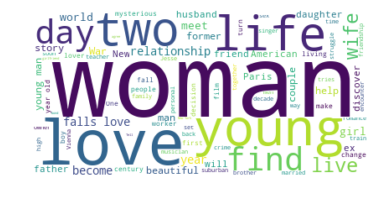

In [21]:
romance_series = movie_df[movie_df["Genre"] == "Romance"]
romance_text=""
for text in romance_series.Synopsis:
    romance_text+=text
wordcloud = WordCloud(background_color="white").generate(romance_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
romance_movies_df = movie_df[movie_df["Genre"] == "Romance"]

bag_of_words_romance = (
    romance_movies_df["Synopsis"].
    str.lower().
    str.replace("[^A-Za-z\s]", "").
    str.split()
).apply(Counter)

tf_romance = pd.DataFrame(list(bag_of_words_romance)).fillna(0)
tf_romance.sum().sort_values()[-50:]

into              6.0
story             6.0
during            6.0
former            6.0
own               6.0
get               6.0
beautiful         6.0
becomes           6.0
girl              7.0
when              7.0
finds             7.0
are               7.0
be                7.0
wife              7.0
relationship      8.0
she               8.0
herself           8.0
new               8.0
lives             9.0
that              9.0
from              9.0
after            10.0
but              10.0
life             11.0
by               11.0
he               11.0
they             11.0
has              11.0
falls            11.0
man              12.0
two              12.0
as               16.0
on               17.0
who              19.0
young            20.0
is               20.0
for              21.0
woman            21.0
their            22.0
love             23.0
an               30.0
her              32.0
with             46.0
his              47.0
of               58.0
to        

According to this TF for romance movies above, it seems like the most common words (if we take out common words like "the", "and", etc.) in the romance movie sysnopsis are: ""falls", "relationship", "love", "wife", "finds", "beautiful", "story", "she", "find"

Common Romance Words: falls, relationship, love, wife, finds, beautiful,story, she, find


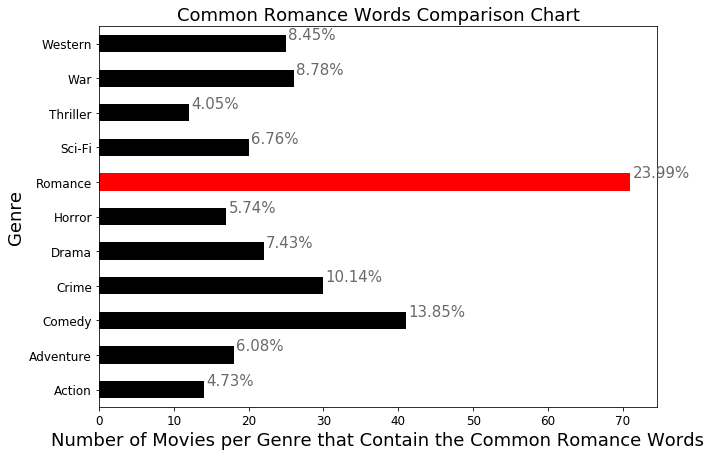

In [42]:
common_romancewords = ["falls", "relationship", "love", "wife", "finds", "beautiful", "story", 
                "she", "find"]
counter = []
for text,genre in zip(movie_df["Synopsis"],movie_df["Genre"]):
    text = text.lower().replace("[^A-Za-z\s]", "")
    count=0
    for word in text.split(" "): 
        if(word in common_romancewords):
            count+=1
    counter.append(count)
movie_df["Word Count"] = counter
start = "\033[1m"
end = "\033[0;0m"
print(start+"Common Romance Words: falls, relationship, love, wife, finds, beautiful,"+ 
      "story, she, find"+end)
word_count = movie_df.groupby("Genre")["Word Count"].sum()
c = ["black","black","black","black","black","black",
     "black","black","black","black","black"]
c[6] = "red"
ax = word_count.plot.barh(figsize=(10,7),
                         fontsize = 12,color=c)
ax.set_xlabel("Number of Movies per Genre that Contain the Common Romance Words"
              , fontsize=18)
ax.set_ylabel("Genre"
              , fontsize=18)
ax.set_title("Common Romance Words Comparison Chart", fontsize=18)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# Results
From the looking at the word frequencies for romance movie synopsis, we were able to look and see what words were most common in the Romance movie synopsis. Once we received the most common romance words, we created a bar graph displaying how these words compared to the the other genres. According to the graph above, the results showed that the Romance genre had the highest Romance Synopsis words, which was as expected. But, We can see that Comedy movies was second with 13.85%. This is also expected because a lot of romance movies are also comedy movies, and these movies are also known as Rom-Coms.

## Overall Conclusion
After looking at all the results above, we find that the common words for each genre occur mostly only in that genre. Hence, we can conclude that each genre has common words in their synopsis and there is a correlation between the words that occur in the synopsis and the movie genre.